In [13]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Step 1: Process the data into dataframes
data = pd.read_csv("Salary_Data[1].csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [15]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [16]:
data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [17]:
# Replacing educational level values with numerical values
# Phd : 4, Masters: 3, Bachelor's : 2 and High School: 1
data = data.replace(to_replace=["PhD","phD", "Master's Degree", "Master's","Bachelor's Degree","Bachelor's","High School"], value=[4,4,3,3,2,2,1])

In [18]:
# Replacing : Male --> 0 and Female --> 1
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

data["Gender"]
# now we have more number of useful columns which can be helpful for our regression purpose.

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
6699    1.0
6700    0.0
6701    1.0
6702    0.0
6703    1.0
Name: Gender, Length: 6704, dtype: float64

In [19]:
# Step 2: Filter Relevant Columns

data_filtered = data[['Years of Experience', 'Salary']].dropna()

x = data_filtered['Years of Experience'].values
y = data_filtered['Salary'].values


In [20]:
# Step 3: Function to Calculate Regression Parameters
def calculate_regression(X, Y):
    """
    Calculate the slope (m) and intercept (c) for linear regression.
    """
    #calculate mean of x & y using an inbuilt numpy method mean()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # total no.of input values
    m = len(X)

    # using the formula to calculate m & c
    num = 0
    den = 0

    for i in range(m):
        num += (X[i] - mean_x) * (Y[i] - mean_y)
        den += (X[i] - mean_x) ** 2

    m = num / den
    c = mean_y - (m * mean_x)

    return m, c

In [21]:
# Calculate parameters
m, c = calculate_regression(x, y)

print("Slope : ",m)
print("intercept : ",c)


# Step 4: Predict Function
def predict(x_value):
    """Predict y (Salary) based on x (Years of Experience)"""

    return m * x_value + c

# Step 5: Evaluate Model's accuracy using Mean Squared Error 
predicted_y = predict(x)
mse = np.mean((y - predicted_y) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

Slope :  7046.768344026587
intercept :  58283.27509418632
Mean Squared Error (MSE): 962743941.6787317


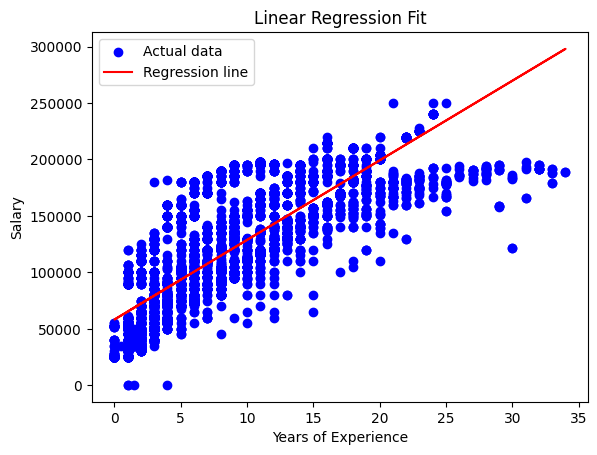

In [22]:
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, predict(x), color="red", label="Regression line")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.show()


In [23]:
# Making X_train matrix for implementing multi variable linear regression
data['dummy']= 1
X_train = data[["dummy","Age","Gender","Education Level", "Years of Experience"]]
Y_train = data["Salary"]

# for performing linear algebra calculations
# convert data into Numpy arrays

X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)

In [24]:
print(np.isnan(X_train_array).any())  # Check for NaN in X_train_array
print(np.isnan(Y_train_array).any())  # Check for NaN in Y_train_array
X_train_array = np.nan_to_num(X_train_array)
Y_train_array = np.nan_to_num(Y_train_array)


True
True


In [25]:
betas = np.linalg.inv(np.dot(X_train_array.T,X_train_array)).dot(X_train_array.T).dot(Y_train_array)
betas

array([83080.8420539 , -2126.58353766, -6769.77062864, 15605.39634903,
        8134.96109547])

In [26]:
Y_test = np.dot(X_train_array,betas)
Y_test

array([ 86915.76702422,  87987.80470431, 171830.58468738, ...,
        76264.20237543, 145963.64370522,  44760.25689064])

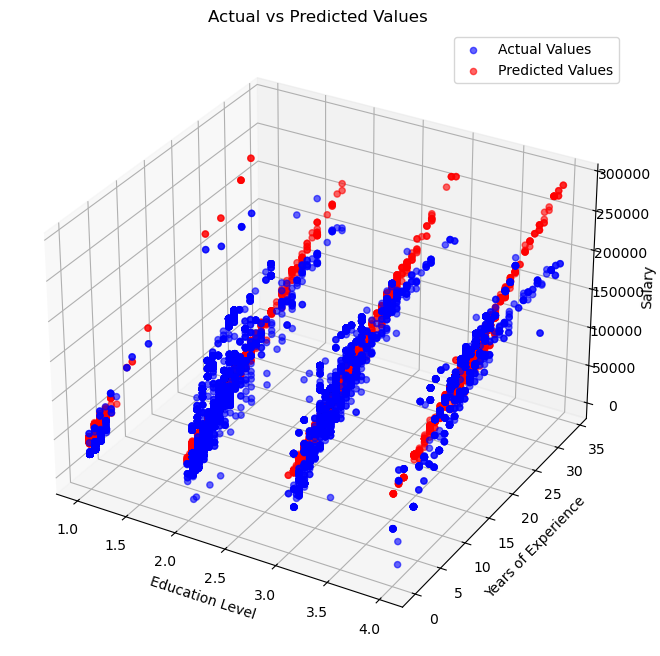

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select two features for 3D visualization (e.g., "Education Level" and "Years of Experience")
feature1 = X_train["Education Level"]
feature2 = X_train["Years of Experience"]
predicted = Y_test

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual Y values
ax.scatter(feature1, feature2, Y_train_array, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted Y values
ax.scatter(feature1, feature2, predicted, color='red', alpha=0.6, label="Predicted Values")

# Add labels and title
ax.set_xlabel("Education Level")
ax.set_ylabel("Years of Experience")
ax.set_zlabel("Salary")
ax.set_title("Actual vs Predicted Values")
ax.legend()

# Show the plot
plt.show()
